# Trabajo Grupal
## Parte a) : Descripción
### Integrantes: Pablo Riquelme, Paula Romero, Pía Saavedra, Mario Rozas.

Primero, instalamos e importamos todo lo necesario.

In [ ]:
#Luego de instalar pydataset y fitter una vez, no es necesario correr nuevamente esas lineas de código
!pip install pydataset 
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

     |████████████████████████████████| 15.9 MB 116 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=f994c5f3bca9fcea5f0d2351fed9a42fae8e0b288c0b4b6b5d08e4ea09c13042
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/
     |████████████████████████████████| 47 kB 3.1 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=cae2749d40c96513f7f9ac9f947a4d50bdcf0eda64d9dd9c2ee6a6554837c032
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=a97c958a7d12b1e1abcf2420b452d233e84f911d2bbb57d88345c7f9c762240f
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter ea

## Dataset a ser utilizado: (corresponde a la base de datos de un banco)
Lo cargamos y le damos un vistazo. Los datos corresponden a los registros de los clientes del banco.

In [ ]:
bank_data = pd.read_csv("BankData.csv")
display(bank_data)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,4003.0,1851,15476,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,4277.0,2186,8764,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,5409.0,0,10291,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,5281.0,0,8395,62


# Ahora analizaremos las variables de este dataset

### -Attrition_Flag

Esta es una variable que nos entregará la información si un cliente está actualmente en el banco o no. En el caso que si se asigna Existing Costumer (Cliente Activo), y en el caso que no Attrited Costumer(Cliente que abandonó), quienes son los que "se dieron a la fuga".

Se ve una muestra de la variable.

In [ ]:
display(bank_data[['Attrition_Flag']].head(22))

,Attrition_Flag
0,Existing Customer
1,Existing Customer
2,Existing Customer
3,Existing Customer
4,Existing Customer
5,Existing Customer
6,Existing Customer
7,Existing Customer
8,Existing Customer
9,Existing Customer


Analizamos como detecta Python la variable (obj, int64 o float64). Vemos que es de tipo obj.

In [ ]:
display(display(bank_data[['Attrition_Flag']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition_Flag  10127 non-null  object
dtypes: object(1)
memory usage: 79.2+ KB


None

None

Por lo que podemos concluir que esta es una variable nominal, porque son simples datos donde no importa el orden.

Ahora veremos cuantos clientes efectivamente están en el banco, ya que realmente estos son los datos que más nos importan analizar. 

In [ ]:
#Cantidad de datos
display(bank_data.groupby('Attrition_Flag').size())

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
dtype: int64

Con esto se concluye la cantidad de clientes activos en el banco versus los que ya no están, en donde se observa una gran diferencia en los números teniendo una cantidad notablemente mayor en los activos. A pesar de esto tener un número de 1627 clientes que se han dado a la fuga es un número significante a tener en cuenta. 

Ahora se hace un histograma de frecuencia para ver de mejor manera la distribución de la variable.

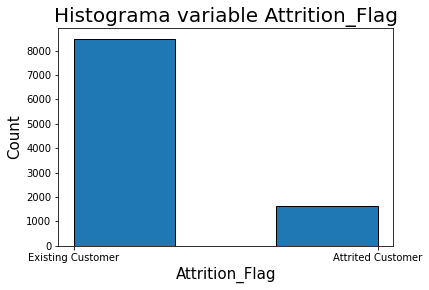

In [ ]:
titaf = plt.title('Histograma variable Attrition_Flag', fontsize=20)
xaf = plt.xlabel('Attrition_Flag', fontsize=15)
yaf = plt.ylabel('Count', fontsize=15)
plt.figureaf = plt.hist(bank_data["Attrition_Flag"], ec='black', bins=3)
plt.show()


Con esto reflejamos lo anteriormente dicho, el banco tiene muchos más clientes actuales que los que ya no están. Esto sirve de referencia a que la clientela del banco es activa, pero que aún así existe un problema respecto a los clientes que han abandonado el banco (correspondiente a 16% aprox.), y por lo tanto sirve para análisis en acciones futuras para estos mismos clientes.

# ----------------------------------------------------------------------------------------

### -Customer_Age

Corresponde a la edad del respectivo cliente.


Muestra de la variable:

In [ ]:
display(bank_data[['Customer_Age']].head(5))

,Customer_Age
0,45
1,49
2,51
3,40
4,40


Analizamos como detecta Python la variable (obj, int64 o float64). Vemos que es de tipo int64.

In [ ]:
display(display(bank_data[['Customer_Age']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Customer_Age  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


None

None

Con esto se puede afirmar que es una variable numérica discreta.

Ahora analizaremos la frecuencia de cada uno de los datos para así ver como se comportan:

In [ ]:
display(bank_data.groupby('Customer_Age').size())

Customer_Age
26     78
27     32
28     29
29     56
30     70
31     91
32    106
33    127
34    146
35    184
36    221
37    260
38    303
39    333
40    361
41    379
42    426
43    473
44    500
45    486
46    490
47    479
48    472
49    495
50    452
51    398
52    376
53    387
54    307
55    279
56    262
57    223
58    157
59    157
60    127
61     93
62     93
63     65
64     43
65    101
66      2
67      4
68      2
70      1
73      1
dtype: int64

Con esta gran cantidad de datos distintos, se puede confirmar que la variable 'Customer_Age' corresponde a una variable numérica discreta.

Al observar la frecuencia de las variables nos percatamos que entre los 30 y 65 años se concentra la mayor cantidad de los clientes. También se observa un extraño suceso, la frecuencia de 65 años es de 101 clientes, mientras que la de 66 años son solo 2 clientes, lo cual nos hace un llamado de atención. Esto último podría deberse a un error de datos.

Para una mejor visual, graficaremos los datos mediante un histograma

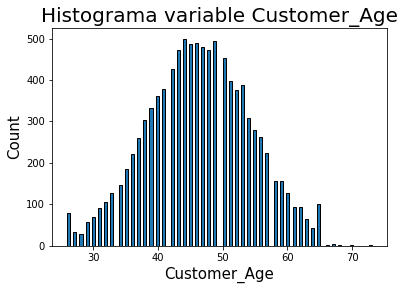

In [ ]:
titca = plt.title('Histograma variable Customer_Age', fontsize=20)
xca = plt.xlabel('Customer_Age', fontsize=15)
yca = plt.ylabel('Count', fontsize=15)
plt.figureca = plt.hist(bank_data["Customer_Age"], ec='black', bins=100)
plt.show()

Ahora, atraves de un algoritmo que analiza un conjunto de datos y hace un ajuste de curva, se encuentra a que distribución continua sigue de mejor manera esta variable.

In [ ]:
#Código sacado de https://towardsdatascience.com/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

data = bank_data['Customer_Age']

distributions = ['alpha', 'beta', 'cauchy', 'chi2', 'expon', 'gamma', 'loggama', 'lognorm', 'norm', 'rayleigh', 'uniform'] #Lista de las distribuciones continuas más conocidas aceptadas por el modulo

f = Fitter(data,
           distributions=distributions)

f.fit()

Aquí muestra las 5 mejores distribuciones que se asemejan, basandose en el menor error de diferencia. Además grafica como estas se asemejan a los datos en cuestión.

,sumsquare_error,aic,bic,kl_div
norm,0.083771,906.187681,-118494.124686,inf
gamma,0.083777,905.659253,-118484.175476,inf
lognorm,0.083786,905.305244,-118483.034258,inf
beta,0.083845,942.936174,-118466.640634,inf
chi2,0.084002,894.064469,-118456.939823,inf


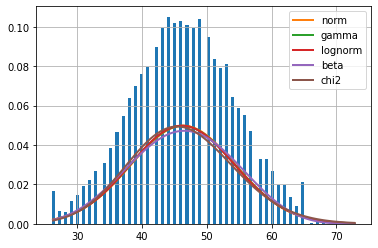

In [ ]:
display(f.summary())

Con lo anterior vemos que la distribución que más se parece es la normal, por lo que si se quisiera hacer un estudio en base a la distribución, esta debería ser la estudiada.

Con el mismo modulo se pueden hayar los parametros de la distribución, lo cual puede llegar a ser útil en algún punto. No se abordará más de esto.

In [ ]:
display(f.get_best(method = 'sumsquare_error'))


{'norm': {'loc': 46.32596030413745, 'scale': 8.01641820891176}}

Con la función describe(), veremos los datos que más nos podrían interesar.

In [ ]:
display(bank_data[['Customer_Age']].describe())

,Customer_Age
count,10127.000000
mean,46.325960
std,8.016814
min,26.000000
25%,41.000000
50%,46.000000
75%,52.000000
max,73.000000


De lo anterior vemos que la media en la edad de los clientes es 46.326 años, con una desviación estándar de 8 años, lo cual en términos de años no es muy alta por lo que los datos estarían distribuidos de buena manera. Existe un máximo de 73 años en edad y un mínimo de 26 años, lo cual es curioso ya que no es un valor tan bajo para ser la edad de un cliente en el banco. Hay que poner mucha atención en el porqué las personas de edad no son clientes, ya que aquí se encuentra la menor proporción.

Ahora se verán las frecuencias de datos mediante rangos, para encontrar que grupo de clientes es mayoritario y debe ser considerado de mayor manera. En este caso arbitrariamente se eligieron rangos de 5.

In [ ]:
a = 26
rango = []
for i in range(0,12):
  rango.append(a)
  a+= 5
  #if i==34:
    #a+= 100
    
ranges = bank_data.groupby(pd.cut(bank_data['Customer_Age'], rango)).count()
display(ranges[['Customer_Age']])

,Customer_Age
Customer_Age,
"(26, 31]",278
"(31, 36]",784
"(36, 41]",1636
"(41, 46]",2375
"(46, 51]",2296
"(51, 56]",1611
"(56, 61]",757
"(61, 66]",304
"(66, 71]",7


Por lo que efectivamente las menores proporciones se concentran en los extremos, es decir los más jóvenes y los adultos mayores, con especial énfasis en éstos últimos. Es por esto que el banco debe poner enfasis en los clientes de mediana edad, ya que son mayoria, y debe implementar politicas para captar y/o retener a los clientes jóvenes y mayores.

# ----------------------------------------------------------------------------------------

### -Gender
Corresponde al género del cliente

Muestra de datos de la variable 'Gender'. M corresponde a 'Male (Hombre)' y F para 'Female (Mujer)'.

In [ ]:
display(bank_data[['Gender']].head(10))

,Gender
0,M
1,F
2,M
3,F
4,M
5,M
6,M
7,M
8,M
9,M


Analizamos como detecta Python la variable (obj, int64 o float64). Veemos que es de tipo 'object', es decir, que no tiene valor númerico.

In [ ]:
display(display(bank_data[['Gender']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  10127 non-null  object
dtypes: object(1)
memory usage: 79.2+ KB


None

None

Ahora veamos la cantidad de datos distintos en esta variable y su frecuencia. Para saber que tipo de variable estamos analizando.

In [ ]:
display(bank_data.groupby('Gender').size())

Gender
F    5358
M    4769
dtype: int64

## Veemos que solo cuenta con 2 datos, M y F, con distinta frecuencia cada uno. Con esto y con lo anterior, de que corresponde a una variable de tipo 'object', se puede decir que ***la variable "Gender" es de tipo categorica nominal***, ya que no hay jerarquia u orden establecido entre los valores, ni tampoco es de tipo númerica.

### Ahora se analizará aspectos como la distribución y datos relevantes que se identifiquen.

Histograma de frecuencia de la variable 'Gender'.

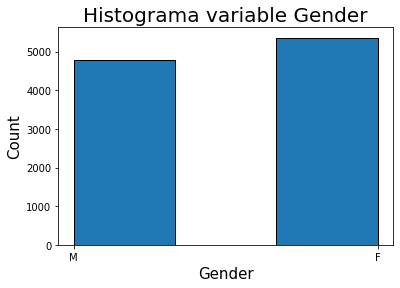

In [ ]:
#Graficamos
tit3 = plt.title('Histograma variable Gender', fontsize=20)
x3 = plt.xlabel('Gender', fontsize=15)
y3 = plt.ylabel('Count', fontsize=15)
plt.figure3 = plt.hist(bank_data["Gender"], ec='black', bins=3)
plt.show()

Ahora veremos los datos estadisticos más relevantes de está variable.

In [ ]:
display(bank_data[['Gender']].describe())

,Gender
count,10127
unique,2
top,F
freq,5358


La moda es 'F', con 5358 de frecuencia. El resto de datos corresponde a 'M' con 4769.

## De lo anterior no se puede sacar mucho, lo unico relevante es que hay más mujeres que hombres en el banco, por lo que quizas el banco deba apuntar sus politicas de cara a ellas, o establecer su marketing a captar más usuarios hombres.

# ----------------------------------------------------------------------------------------

### -Dependent_count
Corresponde al número de personas que dependen financieramente del cliente.

Muestra de la variable 'Dependet_count'.

In [ ]:
display(bank_data[['Dependent_count']].head(10))

,Dependent_count
0,3
1,5
2,3
3,4
4,3
5,2
6,4
7,0
8,3
9,2


Analizamos como detecta Python la variable (obj, int64 o float64). Veemos que es de tipo int64.

In [ ]:
display(display(bank_data[['Dependent_count']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Dependent_count  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


None

None

Ahora veamos la cantidad de datos distintos en esta variable y su frecuencia. Para saber que tipo de variable estamos analizando.

In [ ]:
#Cantidad de datos
display(bank_data.groupby('Dependent_count').size())

Dependent_count
0     904
1    1838
2    2655
3    2732
4    1574
5     424
dtype: int64

## Veemos que posee 6 datos distintos (del 0 al 5), con distintas frecuencias cada uno. Esto hace que ***la variable sea del tipo categorica ordinal***, ya que independiente de que el mismo Python lo detecte como int64, los diferentes tipos de datos son muy pocos como para ser llamados númericos, pero si se puede establecer un orden dentro de ellos, por lo que tampoco es nominal. En base a esto, es que se establece que la variable 'Dependent_count' es de tipo ordinal. 

### Ahora se analizará aspectos como la distribución y datos relevantes que se identifiquen.

Se genera un histograma de los datos de la variable, para poder ver como se distribuyen los datos.

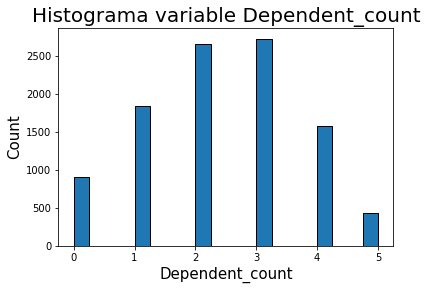

In [ ]:
#Hay que tener cuidado y graficar esto luego de las lineas de abajo, ya que repende genera conflicto.
tit4 = plt.title('Histograma variable Dependent_count', fontsize=20)
x4 = plt.xlabel('Dependent_count', fontsize=15)
y4 = plt.ylabel('Count', fontsize=15)
plt.figure4 = plt.hist(bank_data["Dependent_count"], ec='black', bins=20)
plt.show()

Ahora veremos los datos estadisticos de la variable, con la función .describe().

In [ ]:
display(bank_data[['Dependent_count']].describe())

,Dependent_count
count,10127.000000
mean,2.346203
std,1.298908
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


Lo más importante de aquí son la media (2.4362) y la desviación estandar (1.298908).

De aquí se da cuenta que la desviación es pequeña al igual que la media, ya que los datos se distribuyen de manera relativa cerca de la media.

De todo esto se puede sacar que de media los clientes del banco están a cargo de 2.4 personas, es decir, entre 2-3 personas. ***De aquí se puede sacar que el cliente promedio tiene una familia o al menos personas que dependen monetariamente de ellos.***

Ahora, veamos si hay algún dato especifico que sobresalga en frecuencia

In [ ]:
#Ordenemos de menor a mayor los datos a ver si hay alguno que sobresalga en frecuencia
display(bank_data.groupby('Dependent_count').size().sort_values())

Dependent_count
5     424
0     904
4    1574
1    1838
2    2655
3    2732
dtype: int64

El dato con mayor frecuencia es '3', con 2732, luego '2' con 2655. Entre ambos hacen un aproximado del 53.2% de los datos. Se puede notar que hay una tendencia al alza de la frecuencia del valor '0' hasta llegar al '3', luego este va bajando, siendo '5' el valor con menor frecuencia.

Con esto se puede asumir al menos que se cumple lo de una familia o ambiente de 4 personas en un hogar, con una persona como jefe de este, por lo que las politicas de banco deben estar orientadas con esto en mente para sus clientes.

# ----------------------------------------------------------------------------------------

#Education_Level

La variable Education_Level corresponde al nivel de educación del cliente.
Se muestra una muestra de la variable.

In [ ]:
display(bank_data[['Education_Level']].head(10))

,Education_Level
0,High School
1,Graduate
2,Graduate
3,High School
4,Uneducated
5,Graduate
6,Unknown
7,High School
8,Uneducated
9,Graduate


Para determinar qué tipo de variable es, vemos Python detecta a la variable como object.

In [ ]:
display(display(bank_data[['Education_Level']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Education_Level  10127 non-null  object
dtypes: object(1)
memory usage: 79.2+ KB


None

None

Ahora, vemos la cantidad de datos distintos en esta variable y su frecuencia. 
Vemos que posee 7 datos distintos, con distintas frecuencias. 
Con esto, podemos decir que esta variable es de tipo categórica ordinal ya que es una variable de tipo object que además puede ser ordenada ascendente o descendentemente por los niveles de educación.

In [ ]:
#Cantidad de datos

frecuencia_Education=(bank_data.groupby('Education_Level').size())

display(frecuencia_Education)


Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
dtype: int64

Como la variable es categórica ordinal, ordenamos de manera ascendente dependiendo del nivel de educación, dejando primero a Unknown. 

In [ ]:
#ordenamos los datos de manera ascendente dependiendo del nivel de educacion 
frecuencia_Education=pd.DataFrame(frecuencia_Education.reindex(["Unknown","Uneducated","High School","College", "Graduate", "Post-Graduate","Doctorate"]))
display(frecuencia_Education)

,0
Education_Level,
Unknown,1519
Uneducated,1487
High School,2013
College,1013
Graduate,3128
Post-Graduate,516
Doctorate,451


Para analizar mejor los datos, graficamos la variable en un gráfico de barras. 


<BarContainer object of 7 artists>

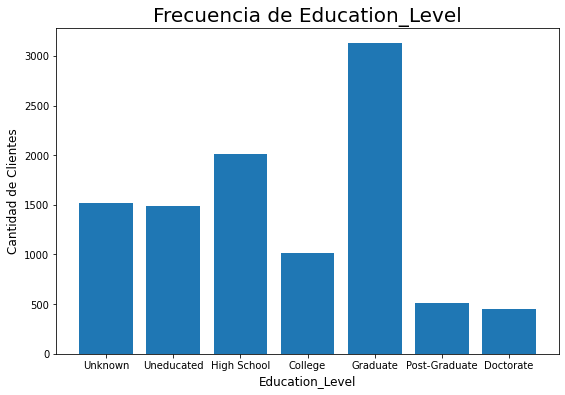

In [ ]:
#Graficamos

plt.figure(figsize=(9, 6))
plt.title("Frecuencia de Education_Level", size=20)
plt.xlabel("Education_Level", size=12)
plt.ylabel("Cantidad de Clientes", size=12)
display(plt.bar(frecuencia_Education.index, frecuencia_Education[0]))

Además, utlizamos la función .describe() para que nos dé más información.

In [ ]:
display(bank_data["Education_Level"].describe())

count        10127
unique           7
top       Graduate
freq          3128
Name: Education_Level, dtype: object

Podemos ver que hay un gran número de clientes con su nivel de educación Graduate (3.128 clientes), lo cual puede ser explicado porque es común que luego de graduarse las personas empiecen a trabajar, necesitan una cuenta bancaria, y además, al trabajar cumplen con los requisitos para tener una tarjeta de crédito, lo cual es tener ingresos fijos con cierta estabilidad. 

Algo interesante es el gran número de clientes de los cual no se sabe que nivel de educación poseen, lo cual puede afectar negativamente al momento de hacer estudios sobre los clientes.

# ----------------------------------------------------------------------------------------

#Marital_Status


La variable Marital_Status corresponde al estado civil del cliente. Se muestra una pequeña muestra de la variable

In [ ]:
display(bank_data[['Marital_Status']].head(10))

,Marital_Status
0,Married
1,Single
2,Married
3,Unknown
4,Married
5,Married
6,Married
7,Unknown
8,Single
9,Single


Analizamos cómo detecta Python la variable, lo cual es de tipo object.

In [ ]:
#Analizamos como detecta Python la variable (obj, int64 o float64)
display(bank_data[['Marital_Status']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Marital_Status  10127 non-null  object
dtypes: object(1)
memory usage: 79.2+ KB


None

Vemos la cantidad de datos distintos de la variable y su frecuencia. Vemos que hay 4 datos distintos con distitnas frecuencias. 
Con esto, se puede decir que esta variable es de tipo categórico nominal ya que es una variable de tipo object que no puede ser ordenada con un orden lógico prestablecido. 

In [ ]:
#Cantidad de datos
frecuencia_Marital=(bank_data.groupby('Marital_Status').size())
display(frecuencia_Marital)


Marital_Status
Divorced     748
Married     4687
Single      3943
Unknown      749
dtype: int64

Para visualizar mejor los datos, hacemos una gráfico de barra.

<BarContainer object of 4 artists>

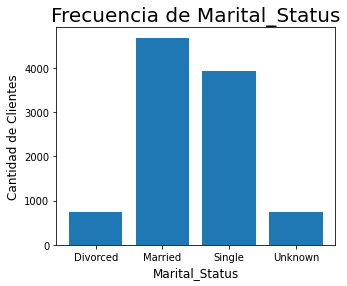

In [ ]:
frecuencia_Marital=pd.DataFrame(frecuencia_Marital)

#Graficamos
plt.figure(figsize=(5, 4))
plt.title("Frecuencia de Marital_Status", size=20)
plt.xlabel("Marital_Status", size=12)
plt.ylabel("Cantidad de Clientes", size=12)
display(plt.bar(frecuencia_Marital.index, frecuencia_Marital[0]))


Utilizamos .describe() para que nos dé más información, como la moda.

In [ ]:
display(bank_data["Marital_Status"].describe())


count       10127
unique          4
top       Married
freq         4687
Name: Marital_Status, dtype: object

Con todo lo anterior, vemos que Married es el estado civil con más frecuencia entre los clientes del banco (4.687 clientes), una posible razón para esto, es puede ser que parejas casadas tengan cuentas en el mismo banco, además de cuentas en común, por lo que el número de personas casadas es mayor. Además las personas casadas suelen tener cierta estabilidad, por lo que suelen tener una cuenta en el banco, donde optan a creditos y ciertos productos.

Respecto a los datos de solteros, es algo esperable teniendo en cuenta que las personas no siempre suelen casarse, incluso estando con alguien.

Algo a destacar tambien es el número de clientes con estado civil desconocido, ya que son mayores a los divorciados. El banco debe recabar estos datos para tener mayor información sobre los clientes.

# ----------------------------------------------------------------------------------------

### -Income_Category
Variable que corresponde al rango del salario del cliente.

Pequeña muestra:

In [ ]:
display(bank_data[['Income_Category']].head(10))

,Income_Category
0,$60K - $80K
1,Less than $40K
2,$80K - $120K
3,Less than $40K
4,$60K - $80K
5,$40K - $60K
6,$120K +
7,$60K - $80K
8,$60K - $80K
9,$80K - $120K


Analizamos como detecta Python la variable (obj, int64 o float64). Vemos que la variable es de tipo object. 

In [ ]:
display(display(bank_data[['Income_Category']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Income_Category  10127 non-null  object
dtypes: object(1)
memory usage: 79.2+ KB


None

None

Ahora veamos la cantidad de datos distintos en esta variable y su frecuencia. Para saber que tipo de variable estamos analizando.

In [ ]:
display(bank_data.groupby('Income_Category').size())

Income_Category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
dtype: int64

Podemos ver que esta variable puede tomar solamente 6 valores ya que el banco tiene rangos para clasificarlos. Con esta informacion y la anterior, podemos señalar que la variable "Income_Category" es de tipo categórica Ordinal. Ya que si bien indica el valor numerico del salario de los clientes, este es asignado a un intervalo y puede ser ordenado.

Aspectos importantes a resaltar de esta variable, es que la mayoria de las personas tienen un salario menor a $40K, ademas de que el banco no conoce los ingresos de mas de 1000 usuarios. De esto se puede suponer que el banco no limita a tener un ingreso minimo para abrir una cuenta y tener una tarjeta.

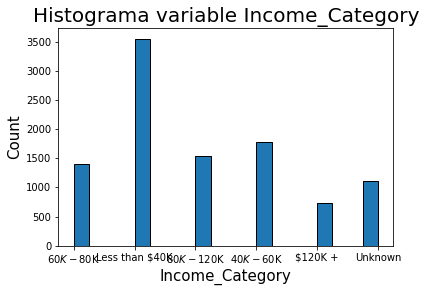

In [ ]:
tit7 = plt.title('Histograma variable Income_Category', fontsize=20)
x7 = plt.xlabel('Income_Category', fontsize=15)
y7 = plt.ylabel('Count', fontsize=15)
plt.figure7 = plt.hist(bank_data["Income_Category"], ec='black', bins=20)
plt.show()


Ahora vemos los datos estadisticos de la variable:

In [ ]:
display(bank_data[['Income_Category']].describe())

,Income_Category
count,10127
unique,6
top,Less than $40K
freq,3561


Frecuencia de los datos ordenados de menor a mayor.

In [ ]:
display(bank_data.groupby('Income_Category').size().sort_values())

Income_Category
$120K +            727
Unknown           1112
$60K - $80K       1402
$80K - $120K      1535
$40K - $60K       1790
Less than $40K    3561
dtype: int64

### Con los datos se puede observar que los que poseen menos ingresos superan con creces a los que poseen un ingreso alto, por lo que el banco debe tener esto en cuenta. Respecto a los clientes sin información, el banco debe solucionar ya que afecta a la relación que tiene con el cliente, al no saber lo suficiente sobre él.

# ----------------------------------------------------------------------------------------

#Card_Category

La variable Card_Category corresponde al tipo de tarjeta de crédito que posee el cliente. Se muestra una pequeña muestra de esta variable

In [ ]:
display(bank_data[['Card_Category']].head(10))

,Card_Category
0,Blue
1,Blue
2,Blue
3,Blue
4,Blue
5,Blue
6,Gold
7,Silver
8,Blue
9,Blue


Al analizar la variable con Python, vemos que la detecta como object.

In [ ]:
display(display(bank_data[['Card_Category']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Card_Category  10127 non-null  object
dtypes: object(1)
memory usage: 79.2+ KB


None

None

Ahora viendo la cantidad de datos distintos de esta variable y su frecuencia, vemos que tiene 4 categorías distintas con distintas frecuencias. 
Asumiendo que cada categoría de tarjeta de crédito implica distintos niveles de beneficios y requisistos para tenerlo, podemos afirmar que Card_Category es una variable categórica ordinal, ya que el tipo de tarjeta puede ser ordenando por la cantidad de beneficios que posee. 

In [ ]:
#Cantidad de datos
frecuencia_Card=(bank_data.groupby('Card_Category').size())
display(frecuencia_Card)

Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
dtype: int64

Como es una variable categórica ordinal, ordenamos las categorías ascentemente dependiendo del nivel de beneficios, asumiendo que el orden es Blue, Silver, Gold y Platinum.

In [ ]:
frecuencia_Card=pd.DataFrame(frecuencia_Card.reindex(["Blue", "Silver","Gold", "Platinum"]))

Para visualizar los datos, graficamos un gráfico de barra.

<BarContainer object of 4 artists>

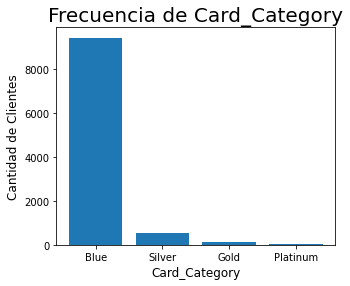

In [ ]:
#Graficamos

plt.figure(figsize=(5, 4))
plt.title("Frecuencia de Card_Category", size=20)
plt.xlabel("Card_Category", size=12)
plt.ylabel("Cantidad de Clientes", size=12)
display(plt.bar(frecuencia_Card.index, frecuencia_Card[0]))


Además, hacemos que python nos diga más información, como la moda.

In [ ]:
display(bank_data["Card_Category"].describe())

count     10127
unique        4
top        Blue
freq       9436
Name: Card_Category, dtype: object

Con lo anterior, vemos que la moda es la tarjeta de crédito Blue con una frecuencia de 9.436 clientes. Esto tiene sentido, ya que es la tarjeta con menos beneficios, por ende es probable que tenga menos requisitos para obtenerla, pudiendo así más personas calificar para tener este tipo de tarjeta. 
Esto se confirma al observar las otras categorías de tarjetas. Mientras más alta sea la categoría, hay menos clientes.

### -Months_on_book

Esta variable ser refiere al número de meses que los clientes llevan en el banco, es decir, su antiguedad. 

Veamos cómo se comporta la variable con los primeros casos

In [ ]:
display(bank_data[['Months_on_book']].head())

,Months_on_book
0,39
1,44
2,36
3,34
4,21


Analizamos como detecta Python la variable (obj, int64 o float64). Vemos que es de tipo int64. Por lo que es una variable numérica discreta.

In [ ]:
display(display(bank_data[['Months_on_book']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Months_on_book  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


None

None

Analicemos la frecuencia de los datos para ver si es que hay algo extraño.

In [ ]:
display(bank_data.groupby('Months_on_book').size())

Months_on_book
13      70
14      16
15      34
16      29
17      39
18      58
19      63
20      74
21      83
22     105
23     116
24     160
25     165
26     186
27     206
28     275
29     241
30     300
31     318
32     289
33     305
34     353
35     317
36    2463
37     358
38     347
39     341
40     333
41     297
42     271
43     273
44     230
45     227
46     197
47     171
48     162
49     141
50      96
51      80
52      62
53      78
54      53
55      42
56     103
dtype: int64

Con lo anterior se aprecia indudablemenente que existe algo extraño en los clientes que llevan 36 meses, el cual tiene una frecuencia increíblemente mayor al resto. Esto puede deberse a un error en los datos, o tambien como hipótesis es que la explicación lógica es que hace 36 meses el banco tuvo una estrategia tan efectiva que reclutó un número historico de nuevos clientes, lo cual es muy poco probable, pero no imposible. 

Veamos como se comporta esta frecuencia en un histograma. 

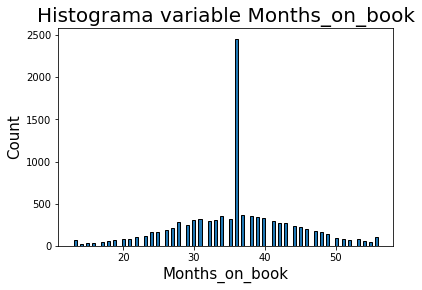

In [ ]:
titmob = plt.title('Histograma variable Months_on_book', fontsize=20)
xmob = plt.xlabel('Months_on_book', fontsize=15)
ymob = plt.ylabel('Count', fontsize=15)
plt.figuremob = plt.hist(bank_data["Months_on_book"], ec='black', bins=100)
plt.show()

Con esto es más que claro lo anormal que es el dato con 36 meses.

Ahora busquemos alguna distribución a la cual se puedan modelar de mejor manera los datos.

In [ ]:
#Código sacado de https://towardsdatascience.com/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

data = bank_data['Months_on_book']

distributions = ['alpha', 'beta', 'cauchy', 'chi2', 'expon', 'gamma', 'loggama', 'lognorm', 'norm', 'rayleigh', 'uniform'] #Lista de las distribuciones continuas más conocidas aceptadas por el modulo

f = Fitter(data,
           distributions=distributions)

f.fit()

,sumsquare_error,aic,bic,kl_div
cauchy,0.316199,904.784266,-105042.529427,inf
lognorm,0.331936,852.581418,-104541.438325,inf
beta,0.331983,850.676719,-104530.788505,inf
norm,0.331986,848.100058,-104549.138258,inf
gamma,0.332135,851.086660,-104535.378674,inf


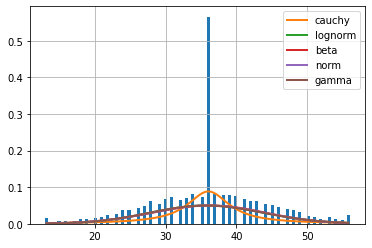

In [ ]:
display(f.summary())


Aquí muestra las 5 mejores distribuciones que se asemejan, basandose en el menor error de diferencia. Además grafica como estas se asemejan a los datos en cuestión. La distribución que más se asemeja es la de Cauchy, por lo que esa es la que hay que tener en consideración. 

Con el mismo modulo se pueden hayar los parametros de la distribución, lo cual puede llegar a ser útil en algún punto. No se abordará más de esto.

In [ ]:
display(f.get_best(method = 'sumsquare_error'))


{'cauchy': {'loc': 36.03963500830243, 'scale': 3.593669385892406}}

Ahora veremos los datos estadisticos de la variable, con la función .describe().

In [ ]:
display(bank_data[['Months_on_book']].describe())

,Months_on_book
count,10127.000000
mean,35.928409
std,7.986416
min,13.000000
25%,31.000000
50%,36.000000
75%,40.000000
max,56.000000


Lo anterior nos dice que se tiene un promedio de casi 36 meses, lo cual es lógico debido a la gigante frecuencia de ese dato, por lo que la media en este caso no tiene mayor significado. 

### Con todo esto, no se puede hacer una buena conclusión de esta variable debido al dato sobresaliente de 36 meses, el cual afecta a todo analisis. Lo unico que el banco puede considerar, es que la mayoria de sus clientes estan hace 36 meses o tienen una antiguedad cercana a este valor, y que va disminuyendo a medida que la antiguedad es menor o mayor.

# ----------------------------------------------------------------------------------------

### -Total_Relationship_Count
Corresponde al número de productos que tiene el cliente en el banco

In [ ]:
display(bank_data[['Total_Relationship_Count']].head(10))

,Total_Relationship_Count
0,5
1,6
2,4
3,3
4,5
5,3
6,6
7,2
8,5
9,6


Analizamos como detecta Python la variable (obj, int64 o float64). Veemos que es de tipo int64.

In [ ]:
display(display(bank_data[['Total_Relationship_Count']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Total_Relationship_Count  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


None

None

Ahora veamos la cantidad de datos distintos en esta variable y su frecuencia. Para saber que tipo de variable estamos analizando.

In [ ]:
#Cantidad de datos
display(bank_data.groupby('Total_Relationship_Count').size())

Total_Relationship_Count
1     910
2    1243
3    2305
4    1912
5    1891
6    1866
dtype: int64

## Veemos que posee 6 datos distintos, con distintas frecuencias cada uno. Al igual que en la variable 'Dependent_count', a pesar de ser detectado por Pyhton como int64, ***corresponde a una variable de tipo catogorica ordinal***, ya que cuenta con poco valores distintos para ser de tipo númerica, y además se puede establecer un orden en esta.

### Ahora se analizará aspectos como la distribución y datos relevantes que se identifiquen.

Se genera un histograma de los datos de la variable, para poder ver como se distribuyen los datos.

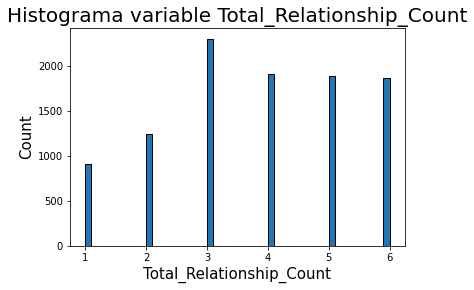

In [ ]:
#Hay que tener cuidado y graficar esto luego de las lineas de abajo, ya que repende genera conflicto.
tit9 = plt.title('Histograma variable Total_Relationship_Count', fontsize=20)
x9 = plt.xlabel('Total_Relationship_Count', fontsize=15)
y9 = plt.ylabel('Count', fontsize=15)
plt.figure9 = plt.hist(bank_data["Total_Relationship_Count"], ec='black', bins=50)
plt.show()

Ahora veremos los datos estadisticos de la variable, con la función .describe().

In [ ]:
display(bank_data[['Total_Relationship_Count']].describe())

,Total_Relationship_Count
count,10127.000000
mean,3.812580
std,1.554408
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,6.000000


Lo más importante de aquí son la media (3.81258) y la desviación estandar (1.554408).

La desviación es pequeña, por lo que no hay una gran distribución de datos lejana de la media, es decir, se acumulan de manera relativa cerca de esta.

Como los posibles valores de esta variable van de 1-6, esto quiere decir que en promedio los clientes tienen una buena cantidad de productos en el banco. Sería interesante saber la información de que tipo de productos tienen los clientes.

Ahora, veamos si hay algún dato especifico que sobresalga en frecuencia

In [ ]:
#Ordenemos de menor a mayor los datos a ver si hay alguno que sobresalga en frecuencia
display(bank_data.groupby('Total_Relationship_Count').size().sort_values())

Total_Relationship_Count
1     910
2    1243
6    1866
5    1891
4    1912
3    2305
dtype: int64

### No hay mucho que pueda sacarse de los datos de esta variable, salvo lo antes dicho, que la gran mayoria de clientes tiene alrededor de 3-4 productos, y en el grafico además se ve que que hay muchos usuarios que tienen 5 o 6 productos, por lo que el banco debe fijarse en estos y ver como retenerlos, ya que son gustosos del servicio que este ofrece. Además el banco debe ver, aunque en menor medida, como hacer que los clientes aumenten el número de productos que poseen.

# ----------------------------------------------------------------------------------------

### -Months_Inactive_12_mon

Esta variable corresponde a los números de meses inactivos en el último año

Veamos una pequeña muestra de la variable:

In [ ]:
display(bank_data[['Months_Inactive_12_mon']].head(10))

,Months_Inactive_12_mon
0,1
1,1
2,1
3,4
4,1
5,1
6,1
7,2
8,2
9,3


Analizamos como detecta Python la variable (obj, int64 o float64). Vemos que es de tipo int64. 

In [ ]:
display(display(bank_data[['Months_Inactive_12_mon']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Months_Inactive_12_mon  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


None

None

Es interesante ver la cantidad de datos con los que trabajaremos y su frecuencia:

In [ ]:
display(bank_data.groupby('Months_Inactive_12_mon').size())

Months_Inactive_12_mon
0      29
1    2233
2    3282
3    3846
4     435
5     178
6     124
dtype: int64

### Por lo anterior estamos frente a una variable numerica discreta si nos basamos netamente en lo que nos dice python, pero si usamos la lógica, nos encontramos frente a muy pocas categorías dentro de la variable, y tiene sentido tener un cierto orden ya que la inactividad de los clientes es fundamental para un banco, por lo que tiene sentido plantearse también que sea una variable ordinal.

Con lo anterior, además vemos que la cantidad de meses en donde mayor inactividad de clientes hay es en 1, 2 y 3. Esto no tiene nada de extraño, simplemente que los clientes siguen un patrón. 

Es interesante plasmar esto gráficamente, por lo que usaremos un histograma:

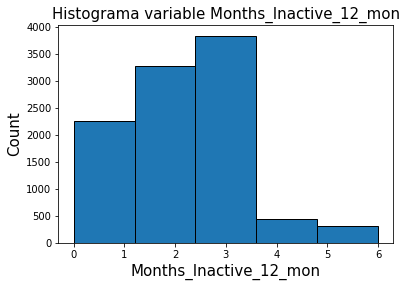

In [ ]:
titmi = plt.title('Histograma variable Months_Inactive_12_mon', fontsize=15)
xmi = plt.xlabel('Months_Inactive_12_mon', fontsize=15)
ymi = plt.ylabel('Count', fontsize=15)
plt.figuremi = plt.hist(bank_data["Months_Inactive_12_mon"], ec='black', bins=5)
plt.show()

Esto corrobora que la cantidad de meses de inactividad es alta hasta el tercero, en donde muy pocos siguen inactivos en el cuarto mes.

Ahora veremos los datos estadisticos de la variable, con la función .describe().

In [ ]:
display(bank_data[['Months_Inactive_12_mon']].describe())

,Months_Inactive_12_mon
count,10127.000000
mean,2.341167
std,1.010622
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,6.000000


Esto anterior nos indica que al ser tan poca la cantidad de meses estudiadas no seguirán una distribución estandar tan alta, y se comprueba al ser 1. El promedio es poco más de dos, lo cual tiene sentido ya que la mayoría de los datos se encuentran entre ese valor y los más cercanos a él. 

### Por lo que ésta variable no posee elementos extraños, sino que, todos siguen una lógica bastante obvia. Una posible explicación es que quizás el banco posee una política que al tercer mes de inactividad se despliega una advertencia y esto podría explicar la baja en el cuarto mes. Otra posible razón es que los clientes usualmente no tienen que pagar cuentas constantemente, por lo que dejan la cuenta si utilizar.

# ----------------------------------------------------------------------------------------

### -Credit_Limit
Corresponde al cupo total de crédito de la cuenta del cliente.

Muestra de la variable:

In [ ]:
display(bank_data[['Credit_Limit']].head(10))

,Credit_Limit
0,12691.0
1,8256.0
2,3418.0
3,3313.0
4,4716.0
5,4010.0
6,34516.0
7,29081.0
8,22352.0
9,11656.0


Analizamos como detecta Python la variable (obj, int64 o float64). Veemos que es de tipo float64.

In [ ]:
display(display(bank_data[['Credit_Limit']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Credit_Limit  10127 non-null  float64
dtypes: float64(1)
memory usage: 79.2 KB


None

None

Ahora veamos la cantidad de datos distintos en esta variable y su frecuencia. Para saber que tipo de variable estamos analizando.

In [ ]:
#Cantidad de datos
display(bank_data.groupby('Credit_Limit').size())

Credit_Limit
1438.3     507
1439.0       2
1440.0       1
1441.0       2
1442.0       1
          ... 
34198.0      1
34427.0      1
34458.0      1
34496.0      1
34516.0    508
Length: 6205, dtype: int64

## Veemos que posee 6205 datos distintos, con distintas frecuencias cada uno. Esto junto con lo anterior, que Python la detecta como Dtype = float64, hace determinar que ***esta variable es de tipo númerica continua***.

### Ahora se analizará aspectos como la distribución y datos relevantes que se identifiquen.

Se genera un histograma de los datos de la variable, para poder ver como se distribuyen los datos.

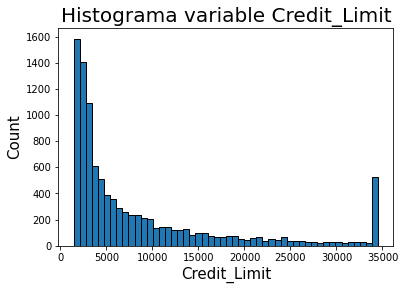

In [ ]:
#Hay que tener cuidado y graficar esto luego de las lineas de abajo, ya que repende genera conflicto.
tit11 = plt.title('Histograma variable Credit_Limit', fontsize=20)
x11 = plt.xlabel('Credit_Limit', fontsize=15)
y11 = plt.ylabel('Count', fontsize=15)
plt.figure11 = plt.hist(bank_data["Credit_Limit"], ec='black', bins=50)
plt.show()

Ahora, atraves de un algoritmo que analiza un conjunto de datos y encuentra a que distribución continua sigue de mejor manera , veremos a que tipo de distribución mejor se asemeja.

In [ ]:
#Código sacado de https://towardsdatascience.com/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

data = bank_data['Credit_Limit']

distributions = ['alpha', 'beta', 'cauchy', 'chi2', 'expon', 'gamma', 'loggama', 'lognorm', 'norm', 'rayleigh', 'uniform'] #Lista de las distribuciones continuas más conocidas aceptadas por el modulo

f = Fitter(data,
           distributions=distributions)

f.fit()

Aquí muestra las 5 mejores distribuciones que se asemejan, basandose en el menor error de diferencia. Además grafica como estas se asemejan a los datos en cuestión.

,sumsquare_error,aic,bic,kl_div
gamma,4.653342e-08,2238.588585,-264348.353960,0.090955
alpha,5.153308e-08,2311.889595,-263314.862670,0.093451
beta,7.533174e-08,2147.856284,-259460.643837,0.208908
expon,8.716387e-08,2240.008695,-258001.679043,0.150064
cauchy,1.206971e-07,2424.184680,-254705.402552,0.229088


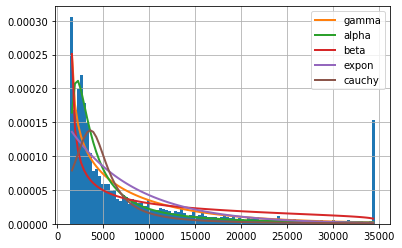

In [ ]:
display(f.summary())

### De aquí se puede sacar como conclusión que la variable "Credit_Limit" sigue una distribución continua de tipo 'Gamma', o al menos es a la que mejor se asemeja.

Con el mismo modulo se pueden hayar los parametros de la distribución, lo cual puede llegar a ser útil en algún punto. No se abordará más de esto.

In [ ]:
display(f.get_best(method = 'sumsquare_error'))
#f.fitted_param["gamma"] #Está linea da los parametros de manera más ordenada, solo hay que darle el nombre de la distribución

{'gamma': {'a': 0.7110583545565183,
  'loc': 1438.2999999999997,
  'scale': 10070.058791708976}}

Ahora veremos los datos estadisticos de la variable, con la función .describe().

In [ ]:
display(bank_data[['Credit_Limit']].describe())

,Credit_Limit
count,10127.000000
mean,8631.953698
std,9088.776650
min,1438.300000
25%,2555.000000
50%,4549.000000
75%,11067.500000
max,34516.000000


Lo más importante de aquí son la media (8631.953698), la desviación estandar (9088.77665), y los valores maximos y minimos.

De aquí se da cuenta que la desviación es grande y mayor a la media, por lo que hay una gran distribución de datos, es decir, que no se acumulan de manera notoria cerca de la media.

La media es un valor relativamente bajo respecto a los valores que puede llegar a tomar la variable, y esto se debe a que hay una gran cantidad de datos que se situa cerca del minimo, al menos visto de manera grafica más arriba. **Con esto se ve que el Banco si bien da cupos altos a ciertas tarjetas de credito de sus clientes, a muchos más les da cupos bajos. Habria que identificar a que se debe este motivo.**

Ahora, veamos si hay algún dato especifico que sobresalga en frecuencia

In [ ]:
#Ordenemos de menor a mayor los datos a ver si hay alguno que sobresalga en frecuencia
display(bank_data.groupby('Credit_Limit').size().sort_values())

Credit_Limit
6511.0       1
10144.0      1
10136.0      1
10133.0      1
10130.0      1
          ... 
23981.0     12
9959.0      18
15987.0     18
1438.3     507
34516.0    508
Length: 6205, dtype: int64

Hay dos valores que sobresalen de todos los demás, que son 1438.3 y 34516.0, que además corresponden al minimo y maximo de la variable. Lo cual es muy raro viniendo de datos númerico continuos, ya que si bien los datos pueden estar dentro de un rango con alta frecuencia, no es común que suceda esto, menos cuando hay muchos valores posibles.

De esto solo hay 2 posibles conclusiones, que el banco tiene establecido que estos son efectivamente los valores minimos y maximos de cupo de las tarjetas de credito de los clientes, y que estos son mayoritarios por motivos varios, como por ejemplo a modo de hipotesis, que el maximo lo dan a clientes de confianza (buena antiguedad y sueldo por ejemplo), los cuales corresponde a una gran cantidad, y que el valor minimo es lo minimo que debe tener una tarjeta para su funcionamiento o que tambien se lo dan a los clientes relativamente nuevos.

La otra conclusión es que hay algún error de datos y que estos valores sobresalen por lo mismo.

Esto es algo que debe tomarse en cuenta.

Ahora se verán las frecuencias de datos mediante rangos, para encontrar que grupo de clientes es mayoritario y debe ser considerado de mayor manera. En este caso arbitrariamente se eligieron rangos de 1000.

In [ ]:
#Ciclo para poder definir lista con rangos 
a = 0
rango = []
for i in range(0,36):
  rango.append(a)
  a+= 1000
  #if i==34:
    #a+= 100
    
ranges = bank_data.groupby(pd.cut(bank_data['Credit_Limit'], rango)).count()
display(ranges[['Credit_Limit']])

,Credit_Limit
Credit_Limit,
"(0, 1000]",0
"(1000, 2000]",1407
"(2000, 3000]",2032
"(3000, 4000]",1199
"(4000, 5000]",721
"(5000, 6000]",573
"(6000, 7000]",411
"(7000, 8000]",376
"(8000, 9000]",342


De aquí se puede sacar que los cupos de rangos bajos tienden a sobresalir, sobretodo los rangos entre [1000-2000], [2000-3000], y [3000-4000]. Hay un rango que se sale de la norma que es el de [34000-35000], esto se debe a lo antes visto, que el valor máximo tiene una frecuencia muy alta.

Con esto, el banco debe prestar especial atención a los que tienen menor cupo en la tarjeta, y a los que tienen un cupo máximo, dado que son la mayoria.

# ----------------------------------------------------------------------------------------

#Total_Revolving_Bal

La variable Total_Revolving_Bal corresponde al cupo utilizado aún no pagado por el cliente. 
Mostrando una pequeña muestra:

In [ ]:
display(bank_data[['Total_Revolving_Bal']].head(10))

,Total_Revolving_Bal
0,777
1,864
2,0
3,2517
4,0
5,1247
6,2264
7,1396
8,2517
9,1677


Analizando cómo Python detecta esta variable vemos que es de tipo int64

In [ ]:
display(display(bank_data[['Total_Revolving_Bal']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Total_Revolving_Bal  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


None

None

Ahora viendo la cantidad de datos distintos y la frecuencia de esta variable vemos que hay una gran cantidad de datos, 1974 datos distintos para ser exactos. Por lo que podemos afirmar que esta varibale es de tipo numérica discreta, ya que al ser int64 implica que son números enteros.

In [ ]:
#Cantidad de datos
display(bank_data.groupby('Total_Revolving_Bal').size())

Total_Revolving_Bal
0       2470
132        1
134        1
145        1
154        1
        ... 
2511       1
2512       2
2513       1
2514       3
2517     508
Length: 1974, dtype: int64

Hacemos una tabla de frecuencias con intervalos para ver las cantidad de clientes en los intervalos. Rangos de 300 de manera arbitraria.


In [ ]:
#Ciclo para poder definir lista con rangos 
a = 0
rango = []
for i in range(0,10):
  rango.append(a)
  a+= 300
  

#Con esto muestra la cantidad de datos por rango
ranges = bank_data.groupby(pd.cut(bank_data['Total_Revolving_Bal'], rango, right = False)).count()
display(ranges[['Total_Revolving_Bal']])

Veamos la frecuencia de datos por rangos


,Total_Revolving_Bal
Total_Revolving_Bal,
"[0, 300)",2513
"[300, 600)",195
"[600, 900)",837
"[900, 1200)",1167
"[1200, 1500)",1456
"[1500, 1800)",1509
"[1800, 2100)",1107
"[2100, 2400)",650
"[2400, 2700)",693


Para obeservar de mejor manera los datos, graficamos un histograma de frecuencia con 50 bins. En este se ve que una gran cantidad de clientes están en el primer intervalo...

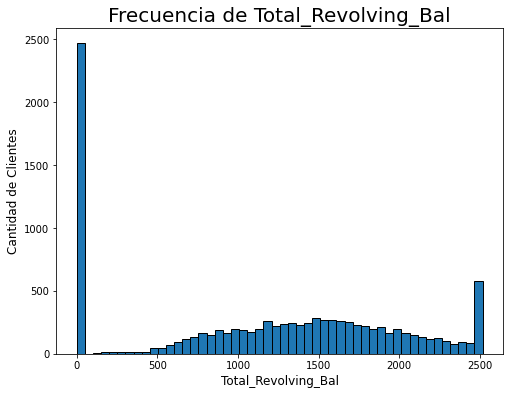

In [ ]:
#Graficamos

plt.figure(figsize=(8, 6))
tit13 = plt.title("Frecuencia de Total_Revolving_Bal", size=20)
x13 = plt.xlabel("Total_Revolving_Bal", size=12)
y13 = plt.ylabel("Cantidad de Clientes", size=12)
plt.figure13 = plt.hist(bank_data["Total_Revolving_Bal"], ec='black', bins=50)
plt.show()

Además, ordenamos descentemente la frecuencia de cada dato para saber cuáles son los datos más repetidos. Además, utilizando .describe() sabemos que el dato máximo es 2.517 y mínimo es 0. 

Ambos extremos son los datos con mayor frecuencia siendo 0 unidades monetarias el que tiene mayor frecuencia, con 2470 clientes, esto puede deberse a clientes que mantienen sus pagos al día y clientes que no utilizan su tarjetas de crédito. La razón para la frecuencia del extremo superior es probable que sea porque ese es el límite establecido por el banco como máximo cupo utilizado no pagado, es probable que esos clientes no pueden utilizar su tarjeta hasta que pagen su cupo utilizado. 

In [ ]:
#Con esto se pueden ordenar de mayor a menor por cantidad de datos
display(bank_data.groupby('Total_Revolving_Bal').size().sort_values(ascending=False))

#Se ve los datos de las variables (media, min, max...)
display(bank_data[['Total_Revolving_Bal']].describe())


Total_Revolving_Bal
0       2470
2517     508
1965      12
1480      12
1664      11
        ... 
1712       1
1756       1
1757       1
1768       1
1447       1
Length: 1974, dtype: int64

,Total_Revolving_Bal
count,10127.000000
mean,1162.814061
std,814.987335
min,0.000000
25%,359.000000
50%,1276.000000
75%,1784.000000
max,2517.000000


Al ser una variable numérica discreta con gran cantidad de datos podemos encontrar alguna distribución continua que mejor modele a esta variable. Utilizando el siguiente código, el cual muestra las 5 distribuciones que mejor modelan a la variable, podemos concluir que Total_Revolving_Bal distribuye como la distribución alpha.

,sumsquare_error,aic,bic,kl_div
alpha,0.000018,2589.201833,-204232.076065,inf
chi2,0.000024,49637.074208,-201018.217702,inf
lognorm,0.000047,2040.925862,-194276.094584,inf
uniform,0.000093,1570.164599,-187339.611471,inf
beta,0.000094,1592.810564,-187253.630786,inf


{'alpha': {'a': 4.361227377967814e-12,
  'loc': -1.8926002819219316,
  'scale': 2.6863791070072627}}

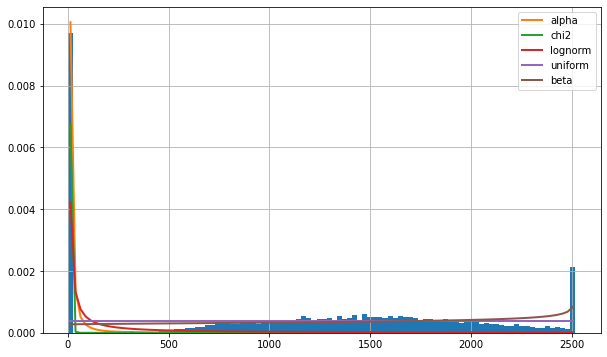

In [ ]:
data = bank_data['Total_Revolving_Bal']

distributions = ['alpha', 'beta', 'cauchy', 'chi2', 'expon', 'gamma', 'loggama', 'lognorm', 'norm', 'rayleigh', 'uniform']

f = Fitter(data,
           distributions=distributions)
plt.figure(figsize=(10,6))
f.fit()
display(f.summary())

display(f.get_best(method = 'sumsquare_error'))
# f.fitted_param["alpha"]


# ----------------------------------------------------------------------------------------

### -Total_Trans_Amt
Corresponde al monto total de todas las transacciones del cliente en los últimos 12 meses.

Pequeña muestra de la variable.

In [ ]:
display(bank_data[['Total_Trans_Amt']].head(10))

"Variable 'Total_Trans_Amt', monto total de todas las transacciones del cliente en los últimos 12 meses."

,Total_Trans_Amt
0,1144
1,1291
2,1887
3,1171
4,816
5,1088
6,1330
7,1538
8,1350
9,1441


Analizamos como detecta Python la variable (obj, int64 o float64). Vemos que es de tipo int64.

In [ ]:
display(display(bank_data[['Total_Trans_Amt']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total_Trans_Amt  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


None

None

Ahora veamos la cantidad de datos distintos en esta variable y su frecuencia. Para saber que tipo de variable estamos analizando.

In [ ]:
display(bank_data.groupby('Total_Trans_Amt').size())

Total_Trans_Amt
510      1
530      1
563      1
569      1
594      1
        ..
17628    1
17634    1
17744    1
17995    1
18484    1
Length: 5033, dtype: int64

Vemos que posee 5033 datos distintos. Con lo anterior, se puede decir que esta variable es de tipo numérica discreta

##Ahora se analizará aspectos como la distribución y datos relevantes que se identifiquen.

Se genera un histograma de los datos de la variable, para poder ver como se distribuyen los datos.

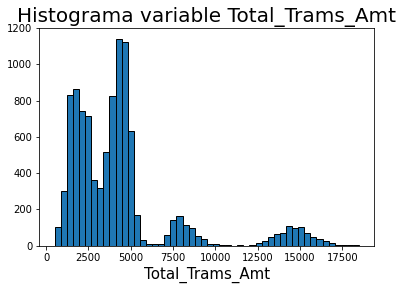

In [ ]:
tTotal_Trams_Amt = plt.title('Histograma variable Total_Trams_Amt', fontsize=20)
xTotal_Trams_Amt = plt.xlabel('Total_Trams_Amt', fontsize=15)
plt.figure14 = plt.hist(bank_data["Total_Trans_Amt"], ec='black', bins=50)
plt.show()

Ahora, a traves de un algoritmo que analiza un conjunto de datos y encuentra a que distribución continua sigue de mejor manera , veremos a que tipo de distribución mejor se asemeja.

In [ ]:
data = bank_data['Total_Trans_Amt']

distributions = ['alpha', 'beta', 'cauchy', 'chi2', 'expon', 'gamma', 'loggama', 'lognorm', 'norm', 'rayleigh', 'uniform'] #Lista de las distribuciones continuas más conocidas aceptadas por el modulo

f = Fitter(data,
           distributions=distributions)

f.fit()

Aquí muestra las 5 mejores distribuciones que se asemejan, basandose en el menor error de diferencia. Además grafica como estas se asemejan a los datos en cuestión.

,sumsquare_error,aic,bic,kl_div
gamma,2.649753e-07,2223.901736,-246732.782991,inf
lognorm,2.694873e-07,2165.113198,-246561.792953,inf
alpha,2.825943e-07,2182.624837,-246080.850261,inf
cauchy,3.358452e-07,2222.363074,-244341.768949,inf
chi2,3.676395e-07,2332.521845,-243416.534967,inf


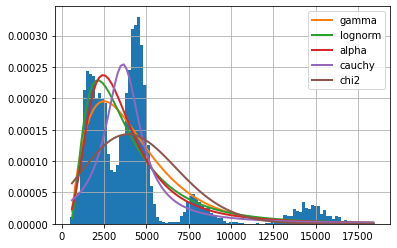

In [ ]:
display(f.summary())

La variable "Total_Trans_Amt" sigue una distribución continua de tipo 'Gamma'.

Con el mismo modulo se pueden hayar los parametros de la distribución, lo cual puede llegar a ser útil en algún punto. No se abordará más de esto.

In [ ]:
display(f.get_best(method = 'sumsquare_error'))
#f.fitted_param["gamma"] #Está linea da los parametros de manera más ordenada, solo hay que darle el nombre de la distribución

{'gamma': {'a': 2.105313159210036,
  'loc': 502.28054368523544,
  'scale': 1803.7838184022212}}

Ahora veremos los datos estadisticos de la variable, con la función .describe()

In [ ]:
display(bank_data[['Total_Trans_Amt']].describe())

,Total_Trans_Amt
count,10127.000000
mean,4404.086304
std,3397.129254
min,510.000000
25%,2155.500000
50%,3899.000000
75%,4741.000000
max,18484.000000


La media es 4404.086304 y la desviación estandar 3397.129254. Podemos observar que la desviacion alcanza un valor alto, lo que nos indica que los datos se distribuyen por un alto rango de valores y no estan tan agrupados a la media. Ademas de que el valor maximo del monto total de todas las transacciones de un cliente se ve bastante alejado de la media.

Ahora, veamos si hay algún dato especifico que sobresalga en frecuencia

In [ ]:
#Ordenemos de menor a mayor los datos a ver si hay alguno que sobresalga en frecuencia
display(bank_data.groupby('Total_Trans_Amt').size().sort_values())

Total_Trans_Amt
510      1
5413     1
5418     1
5421     1
5425     1
        ..
4498     9
4518    10
2229    10
4509    11
4253    11
Length: 5033, dtype: int64

Se concluye que no hay algun monto que sobresalga.

Ahora se verán las frecuencias de datos mediante rangos, para encontrar que grupo de clientes es mayoritario y debe ser considerado de mayor manera. En este caso arbitrariamente se eligieron rangos de 1000.

In [ ]:
#Ciclo para poder definir lista con rangos 
a = 0
rango = []
for i in range(0,23):
  rango.append(a)
  a+= 1000
  #if i==34:
    #a+= 100
    
ranges = bank_data.groupby(pd.cut(bank_data['Total_Trans_Amt'], rango)).count()
display(ranges[['Total_Trans_Amt']])

,Total_Trans_Amt
Total_Trans_Amt,
"(0, 1000]",162
"(1000, 2000]",2046
"(2000, 3000]",1689
"(3000, 4000]",1391
"(4000, 5000]",2952
"(5000, 6000]",437
"(6000, 7000]",25
"(7000, 8000]",337
"(8000, 9000]",269


El monto de transcciones en la mayoria de los clientes va entre los 4000 y 5000, el cual es un rango que contiene a la media calculadara anteriormente. Ademas se observa que a medida que el monto de transacciones aumenta, la cantidad de clientes en ese rango disminuye.

Una observación es que no hay ningún cliente con monto total de transacción igual a 0 en los ultimos 12 meses, lo cual significa que todos los clientes han estado aunque sea algo activos en ese periodo de tiempo, lo cual es positivo para el banco.

# ----------------------------------------------------------------------------------------

### -Total_Trans_Ct
Corresponde al número de transacciones total realizadas por el cliente en los últimos 12 meses.

In [ ]:
display(bank_data[['Total_Trans_Ct']].head(10))

''

,Total_Trans_Ct
0,42
1,33
2,20
3,20
4,28
5,24
6,31
7,36
8,24
9,32


Analizamos como detecta Python la variable (obj, int64 o float64). La variables es de tipo Int64.

In [ ]:
display(display(bank_data[['Total_Trans_Ct']].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Total_Trans_Ct  10127 non-null  int64
dtypes: int64(1)
memory usage: 79.2 KB


None

None

Ahora veamos la cantidad de datos distintos en esta variable y su frecuencia. Para saber que tipo de variable estamos analizando.

In [ ]:
#Cantidad de datos
display(bank_data.groupby('Total_Trans_Ct').size())

Total_Trans_Ct
10       4
11       2
12       4
13       5
14       9
15      16
16      13
17      13
18      23
19      11
20      19
21      33
22      35
23      34
24      50
25      57
26      56
27      82
28      73
29      75
30      84
31     100
32     104
33     116
34     107
35     136
36     135
37     141
38     139
39     126
40     136
41     138
42     132
43     147
44     127
45     129
46     100
47     110
48      98
49     118
50      91
51      92
52      64
53      85
54      89
55      78
56     106
57      94
58     103
59      97
60     111
61     118
62     134
63     150
64     158
65     166
66     164
67     186
68     170
69     202
70     193
71     203
72     168
73     183
74     190
75     203
76     198
77     197
78     190
79     184
80     173
81     208
82     202
83     169
84     147
85     148
86     133
87     137
88     114
89      93
90      83
91      62
92      66
93      55
94      51
95      40
96      44
97      42
98      31
99    

Vemos que posee 129 datos distintos. Ademas se observa que no hay ningun cliente que haya hecho menos de 10 transacciones durante el año.
Por otra parte, complementando con la informacion anterior, podemos afirmar que la variable "Total_Trans_Ct" es una variable de tipo numerica discreta.

Ahora se analizará aspectos como la distribución y datos relevantes que se identifiquen.

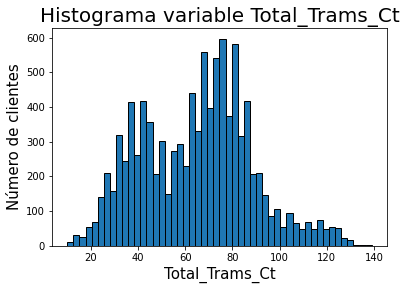

In [ ]:
tTotal_Trams_Ct = plt.title('Histograma variable Total_Trams_Ct', fontsize=20)
xTotal_Trams_Ct = plt.xlabel('Total_Trams_Ct', fontsize=15)
yTotal_Trams_Ct = plt.ylabel('Número de clientes', fontsize=15)
plt.figure15 = plt.hist(bank_data["Total_Trans_Ct"], ec='black', bins=50)
plt.show()

Ahora, a traves de un algoritmo que analiza un conjunto de datos y encuentra a que distribución continua sigue de mejor manera , veremos a que tipo de distribución mejor se asemeja.

In [ ]:
data = bank_data['Total_Trans_Ct']

distributions = ['alpha', 'beta', 'cauchy', 'chi2', 'expon', 'gamma', 'loggama', 'lognorm', 'norm', 'rayleigh', 'uniform'] #Lista de las distribuciones continuas más conocidas aceptadas por el modulo

f = Fitter(data,
           distributions=distributions)

f.fit()

Aquí muestra las 5 mejores distribuciones que se asemejan, basandose en el menor error de diferencia. Además grafica como estas se asemejan a los datos en cuestión.

,sumsquare_error,aic,bic,kl_div
norm,0.002142,1087.513382,-155625.185110,inf
beta,0.002184,1090.560788,-155406.493991,inf
lognorm,0.002245,1079.764440,-155139.743130,inf
gamma,0.002254,1079.297932,-155096.973336,inf
chi2,0.002270,1077.978800,-155024.555122,inf


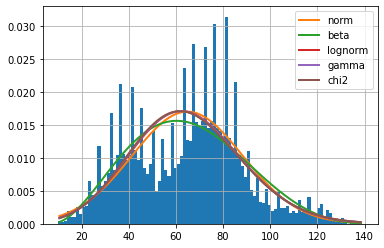

In [ ]:
display(f.summary())

La variable 'Total_Trans_Ct' sigue una distribución continua de tipo 'Normal'.

Con el mismo modulo se pueden hayar los parametros de la distribución, lo cual puede llegar a ser útil en algún punto. No se abordará más de esto.

In [ ]:
display(f.get_best(method = 'sumsquare_error'))

{'norm': {'loc': 64.85869457884863, 'scale': 23.471411510261287}}

Ahora veremos los datos estadisticos de la variable, con la función .describe().

In [ ]:
display(bank_data[['Total_Trans_Ct']].describe())

,Total_Trans_Ct
count,10127.000000
mean,64.858695
std,23.472570
min,10.000000
25%,45.000000
50%,67.000000
75%,81.000000
max,139.000000


La media de transacciones al año es de aproximandamente 65 transacciones, la desviación estandar 23.472570 transacciones, y los valores maximos y minimos son 10 y 139 respectivamente. La desviación es alta pero acorde al valor de la media, por lo que los datos están distribuidos de forma no tan alejada a la media.

Ahora, veamos si hay algún dato especifico que sobresalga en frecuencia

In [ ]:
#Ordenemos de menor a mayor los datos a ver si hay alguno que sobresalga en frecuencia
display(bank_data.groupby('Total_Trans_Ct').size().sort_values(ascending=False))

Total_Trans_Ct
81     208
75     203
71     203
69     202
82     202
76     198
77     197
70     193
74     190
78     190
67     186
79     184
73     183
80     173
68     170
83     169
72     168
65     166
66     164
64     158
63     150
85     148
43     147
84     147
37     141
38     139
41     138
87     137
35     136
40     136
36     135
62     134
86     133
42     132
45     129
44     127
39     126
49     118
61     118
33     116
88     114
60     111
47     110
34     107
56     106
32     104
58     103
46     100
31     100
48      98
59      97
57      94
89      93
51      92
50      91
54      89
53      85
30      84
90      83
27      82
55      78
29      75
28      73
92      66
52      64
91      62
25      57
26      56
93      55
94      51
24      50
96      44
97      42
95      40
99      38
100     38
22      35
23      34
21      33
116     32
105     32
103     31
98      31
104     31
120     31
106     31
102     30
124     28
101     25
110   

Por lo que se puede ver, los clientes suelen tener buenos números respecto a la cantidad de transacciones hechas en los ultimos 12 meses, y al igual que en la variable anterior, se puede ver que no hay clientes inactivos durante este periodo.